In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
df = pd.read_csv('train.csv')

In [88]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [90]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [91]:
df['Age'].fillna(df['Age'].median(), inplace=True)

C:\Users\Gligor Ligovski\AppData\Local\Temp\ipykernel_12216\1933487976.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [92]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Gligor Ligovski\AppData\Local\Temp\ipykernel_12216\3744086084.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [93]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

In [94]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
HasCabin         0
dtype: int64


In [95]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.228956
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


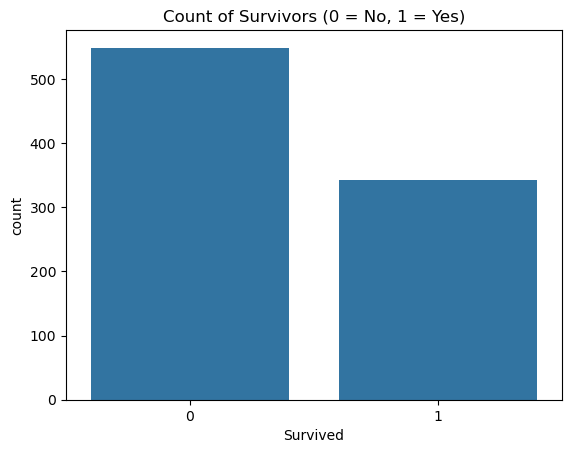

In [96]:
sns.countplot(x='Survived', data=df)
plt.title('Count of Survivors (0 = No, 1 = Yes)')
plt.show()

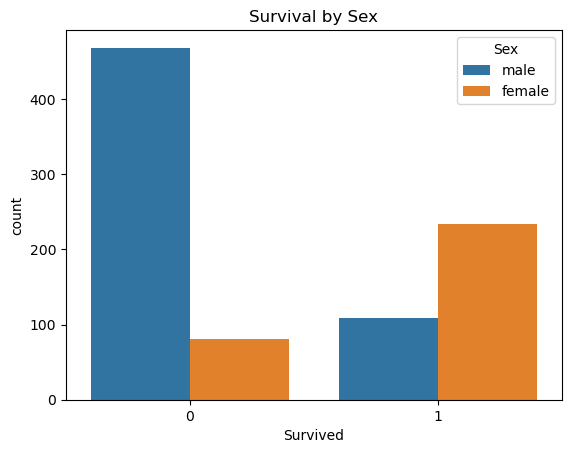

In [97]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

In [98]:
print(df.groupby('Pclass')['Survived'].mean())

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [99]:
print(df.groupby('Sex')['Survived'].mean())

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [100]:
print(df.groupby('Embarked')['Survived'].mean())

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64


In [101]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [102]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()
print(corr)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144 -0.042939  0.034212 -0.057527   
Survived       -0.005007  1.000000 -0.338481  0.543351 -0.064910 -0.035322   
Pclass         -0.035144 -0.338481  1.000000 -0.131900 -0.339898  0.083081   
Sex            -0.042939  0.543351 -0.131900  1.000000 -0.081163  0.114631   
Age             0.034212 -0.064910 -0.339898 -0.081163  1.000000 -0.233296   
SibSp          -0.057527 -0.035322  0.083081  0.114631 -0.233296  1.000000   
Parch          -0.001652  0.081629  0.018443  0.245489 -0.172482  0.414838   
Fare            0.012658  0.257307 -0.549500  0.182333  0.096688  0.159651   
Embarked       -0.030467  0.106811  0.045702  0.116569 -0.009165 -0.059961   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030467  
Survived     0.081629  0.257307  0.106811  
Pclass       0.018443 -0.549500  0.045702  
Sex          0.245489  0.182333  0.116569  

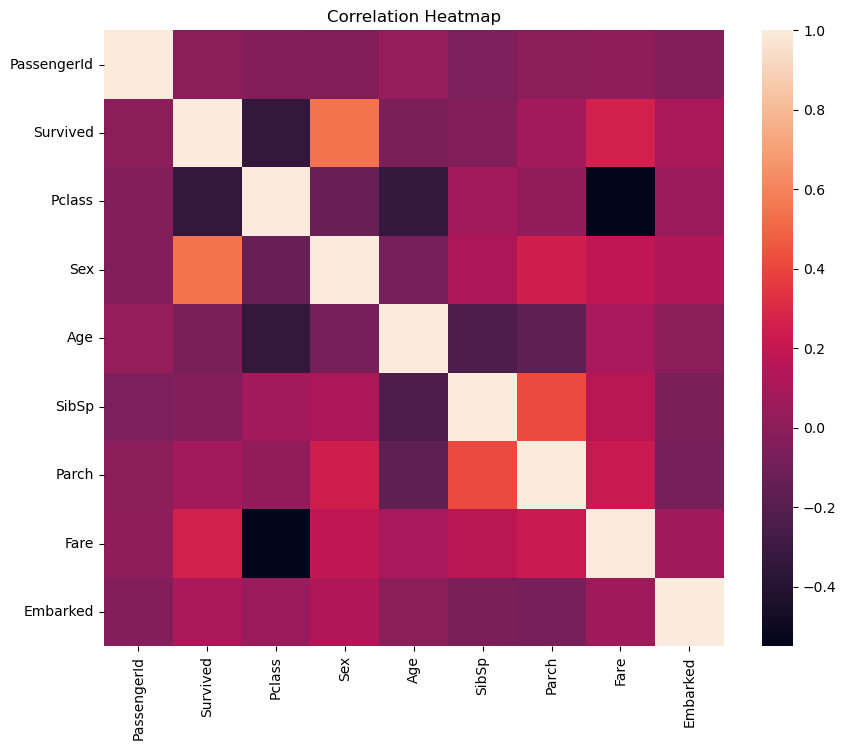

In [103]:
plt.figure(figsize=(10,8))
sns.heatmap(corr)
plt.title('Correlation Heatmap')
plt.show()

In [104]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,100], labels=['Child','Teen','Young Adult','Adult','Senior'])
print(df.groupby('AgeGroup')['Survived'].mean())

AgeGroup
Child          0.579710
Teen           0.428571
Young Adult    0.353271
Adult          0.400000
Senior         0.227273
Name: Survived, dtype: float64


C:\Users\Gligor Ligovski\AppData\Local\Temp\ipykernel_12216\1068425615.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean())


In [105]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'HasCabin']
X = df[features]
y = df['Survived']
print("Selected features for machine learning:", features)

Selected features for machine learning: ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'HasCabin']


In [106]:
print("""These features can be used to predict surviveability using linear regression, decision trees and other models""")

These features can be used to predict surviveability using linear regression, decision trees and other models
